In [ ]:
import numpy as np
import pandas as pd
import investpy
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from arch import arch_model

In [ ]:
DJ = investpy.get_index_historical_data(index='DJ Life Insurance',
                                        country='United States',
                                        from_date='01/04/2011',
                                        to_date='01/04/2021')
AEX = investpy.get_index_historical_data(index='AEX',
                                        country='Netherlands',
                                        from_date='01/04/2011',
                                        to_date='01/04/2021')
SP500=investpy.get_index_historical_data(index='s&p 500',
                                    country='United States',
                                    from_date='01/04/2011',
                                    to_date='01/04/2021')
euro_usd = investpy.get_currency_cross_historical_data(currency_cross='EUR/USD',
                                                    from_date='01/04/2011',
                                                    to_date='01/04/2021')
bond=investpy.get_bond_historical_data('Netherlands 3Y',
                                    from_date='01/04/2011',
                                    to_date='01/04/2021')
data=pd.DataFrame({'DJ':DJ.Close,'SP500':SP500.Close,'AEX':AEX.Close,'bond':bond.Close,'euro_usd':euro_usd.Close})
data=data.dropna() # synchronize

In [ ]:
data['DJ']=data['DJ']/data['euro_usd']
data['SP500']=data['SP500']/data['euro_usd']

In [ ]:
# Log return
L=pd.DataFrame(columns=['DJ','SP500','AEX','bond'])
L['DJ']=np.log(data['DJ']).diff() # log return
L['SP500']=np.log(data['SP500']).diff()
L['AEX']=np.log(data['AEX']).diff()
L['bond']=data['bond'].diff() 
L['bond']=L['bond']/100 #change yield
L['y']=data['bond']
L=L.dropna() # remove first row
# compute everyday portfolio loss, last column
L['loss']=L.apply(lambda r: 0.25*(1-np.exp(r.DJ))+\
                            0.25*(1-np.exp(r.SP500))+\
                            0.25*(1-np.exp(r.AEX))\
                           -0.25*(1-np.exp(-r.bond))+\
                            0.25*r.y / 25000,
                            axis=1) # without time to maturity
L

,DJ,SP500,AEX,bond,y,loss
Date,,,,,,
2011-04-04,0.008998,0.000978,-0.001192,-0.00005,2.203,-0.002172
2011-04-05,-0.006810,-0.000250,-0.000136,-0.00004,2.199,0.001825
2011-04-06,0.004346,-0.005523,0.001841,0.00015,2.214,-0.000188
2011-04-07,-0.007429,0.000504,-0.006106,-0.00003,2.211,0.003276
2011-04-08,-0.025490,-0.016311,-0.001226,0.00083,2.294,0.010458
...,...,...,...,...,...,...
2021-03-26,0.008567,0.013778,0.016340,0.00004,-0.714,-0.009755
2021-03-29,-0.008139,0.002018,0.001893,0.00010,-0.704,0.001016
2021-03-30,0.021004,0.000926,0.004546,0.00019,-0.685,-0.006732


In [ ]:
L

,DJ,SP500,AEX,bond,y,loss
Date,,,,,,
2011-04-04,0.008998,0.000978,-0.001192,-0.00005,2.203,-0.002172
2011-04-05,-0.006810,-0.000250,-0.000136,-0.00004,2.199,0.001825
2011-04-06,0.004346,-0.005523,0.001841,0.00015,2.214,-0.000188
2011-04-07,-0.007429,0.000504,-0.006106,-0.00003,2.211,0.003276
2011-04-08,-0.025490,-0.016311,-0.001226,0.00083,2.294,0.010458
...,...,...,...,...,...,...
2021-03-26,0.008567,0.013778,0.016340,0.00004,-0.714,-0.009755
2021-03-29,-0.008139,0.002018,0.001893,0.00010,-0.704,0.001016
2021-03-30,0.021004,0.000926,0.004546,0.00019,-0.685,-0.006732


In [ ]:
# stress perid: 2020/01/10-2020/04/29
L_no_stress= pd.concat([L[0:2185],L[2260:]])
L_no_stress

,DJ,SP500,AEX,bond,y,loss
Date,,,,,,
2011-04-04,0.008998,0.000978,-0.001192,-0.00005,2.203,-0.002172
2011-04-05,-0.006810,-0.000250,-0.000136,-0.00004,2.199,0.001825
2011-04-06,0.004346,-0.005523,0.001841,0.00015,2.214,-0.000188
2011-04-07,-0.007429,0.000504,-0.006106,-0.00003,2.211,0.003276
2011-04-08,-0.025490,-0.016311,-0.001226,0.00083,2.294,0.010458
...,...,...,...,...,...,...
2021-03-26,0.008567,0.013778,0.016340,0.00004,-0.714,-0.009755
2021-03-29,-0.008139,0.002018,0.001893,0.00010,-0.704,0.001016
2021-03-30,0.021004,0.000926,0.004546,0.00019,-0.685,-0.006732


In [ ]:
def cal_VaR_ES(returns,CI=0.975,method='normal',df=3):
    weights = np.array([0.25, 0.25, 0.25, 0.25])
    initial_investment = 1000000
    avg_rets = returns.mean()
    cov_matrix = returns.cov()
    port_mean = avg_rets.dot(weights) 
    port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    if method=='normal':
            VaR=(-port_mean + norm.ppf(CI)*port_stdev)*initial_investment
            #print('VaR',VaR)
            ES=(-port_mean + port_stdev*norm.pdf(norm.ppf(CI))/(1-CI))*initial_investment
            #print('ES',ES)

    elif method=='student':
            t_std= np.sqrt((df-2)/df)*port_stdev
            VaR=(-port_mean+ stats.t.ppf(CI,df)*t_std)*initial_investment
            #print('VaR',VaR)
            ES=(-port_mean + t_std*stats.t.pdf(x=stats.t.ppf(CI,df=df),df=df)/(1-CI)*((df+stats.t.ppf(CI, df)**2)/(df-1)))*initial_investment
            #print('ES',ES)

    return VaR, ES

In [ ]:
# Investigate the sensitivity of your results to the length of the estimation period
# 2 years/ 5 years / 10 years
# result_sens = pd.DataFrame(columns=['two_VaR_975_norm','two_ES_975_norm','two_VaR_99_norm','two_ES_99_norm',
# 'five_VaR_975_norm','five_ES_975_norm','five_VaR_99_norm','five_ES_99_norm',
# 'ten_VaR_975_norm','ten_ES_975_norm','ten_VaR_99_norm','ten_ES_99_norm'])

VaR1,ES1=cal_VaR_ES(L.iloc[0:500,:4],CI=0.975,method='normal')
VaR2,ES2=cal_VaR_ES(L.iloc[0:500,:4],CI=0.99,method='normal')
VaR3,ES3=cal_VaR_ES(L.iloc[0:1250,:4],CI=0.975,method='normal')
VaR4,ES4=cal_VaR_ES(L.iloc[0:1250,:4],CI=0.99,method='normal')
VaR5,ES5=cal_VaR_ES(L.iloc[:,:4],CI=0.975,method='normal')
VaR6,ES6=cal_VaR_ES(L.iloc[:,:4],CI=0.99,method='normal')

print('two years 975 VaR:',VaR1)
print('two years 975 ES:',ES1)
print('two years 99 VaR:',VaR2)
print('two years 99 ES:',ES2)

print('five years 975 VaR:',VaR3)
print('five years 975 ES:',ES3)
print('five years 99 VaR:',VaR4)
print('five years 99 ES:',ES4)

print('ten years 975 VaR:',VaR5)
print('ten years 975 ES:',ES5)
print('ten years 99 VaR:',VaR6)
print('ten years 99 ES:',ES6)
# result_sens.two_VaR_975_norm=VaR1
# result_sens.two_ES_975_norm=ES1
# result_sens.two_VaR_99_norm=VaR2
# result_sens.two_ES_99_norm=ES2

# result_sens.five_VaR_975_norm=VaR3
# result_sens.five_ES_975_norm=ES3
# result_sens.five_VaR_99_norm=VaR4
# result_sens.five_ES_99_norm=ES4

# result_sens.ten_VaR_975_norm=VaR5
# result_sens.ten_ES_975_norm=ES5
# result_sens.ten_VaR_99_norm=VaR6
# result_sens.ten_ES_99_norm=ES6

two years 975 VaR: 17570.703018575077
two years 975 ES: 20974.265940105648
two years 99 VaR: 20871.080311922546
two years 99 ES: 23923.580235836707
five years 975 VaR: 16748.252634540786
five years 975 ES: 20021.941888101563
five years 99 VaR: 19922.693632701885
five years 99 ES: 22858.715803527244
ten years 975 VaR: 18033.44892786671
ten years 975 ES: 21561.59746873486
ten years 99 VaR: 21454.634785245213
ten years 99 ES: 24618.86985327645


In [ ]:
# Especially investigate the differences when you do and do not include stressed periods

VaR7,ES7=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.975,method='normal')
VaR8,ES8=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.99,method='normal')

print('ten years 975 VaR without stress:',VaR7)
print('ten years 975 ES without stress:',ES7)
print('ten years 99 VaR without stress:',VaR8)
print('ten years 99 ES without stress:',ES8)

ten years 975 VaR without stress: 15445.750104749119
ten years 975 ES without stress: 18487.74209657591
ten years 99 VaR without stress: 18395.518194200264
ten years 99 ES without stress: 21123.741687545593


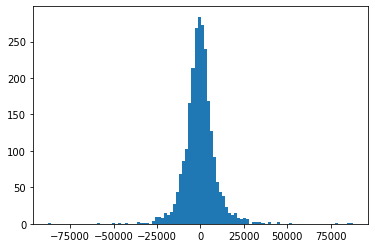

In [ ]:
# Use historical returns on your assets and historical portfolio returns 
# to assess the validity of the normal approximation
# comparing the histograms to the densities of the normal distribution and/or by a QQ-plot.
results=pd.DataFrame(L.loss*1000000,index=L.index)
plt.hist(results.loss,bins=100)
plt.show()

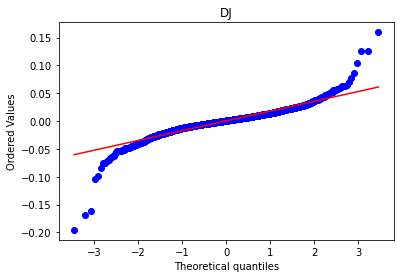

In [ ]:
#plt.figure(figsize=(5,5))
stats.probplot(L.DJ, dist="norm", plot=pylab)
plt.title('DJ')
plt.savefig('qqnorm_DJ',dpi=400)
plt.show()

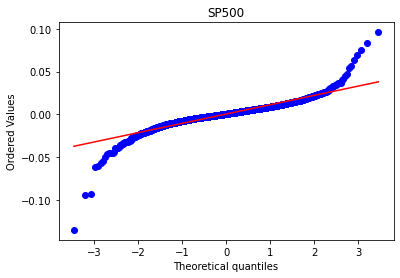

In [ ]:
stats.probplot(L.SP500, dist="norm", plot=pylab)
plt.title('SP500')
plt.savefig('qqnorm_SP500',dpi=400)
plt.show()

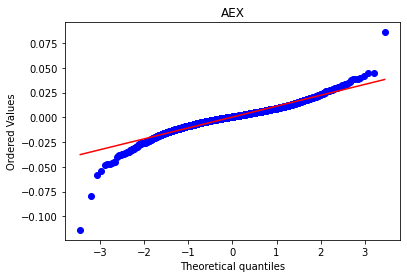

In [ ]:
stats.probplot(L.AEX, dist="norm", plot=pylab)
plt.title('AEX')
plt.savefig('qqnorm_AEX',dpi=400)
plt.show()

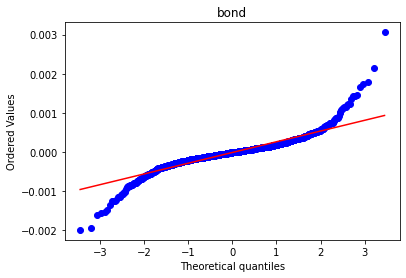

In [ ]:
stats.probplot(L.bond, dist="norm", plot=pylab)
plt.title('bond')
plt.savefig('qqnorm_bond',dpi=400)
plt.show()

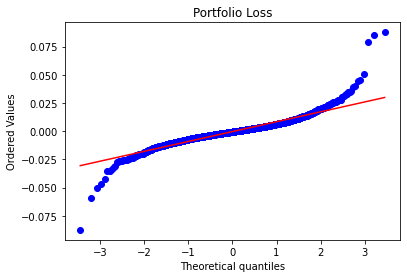

In [ ]:
stats.probplot(L.loss, dist="norm", plot=pylab)
plt.title('Portfolio Loss')
plt.savefig('qqnorm_loss',dpi=400)
plt.show()

In [ ]:
#  use Student-t distribution with 3, 4, 5 and 6 degrees of freedom instead of the Normal distribution
# how many years? 10years? with or without stress period?
VaR9,ES9=cal_VaR_ES(L.iloc[:,:4],CI=0.975,method='student',df=3)
VaR10,ES10=cal_VaR_ES(L.iloc[:,:4],CI=0.99,method='student',df=3)
VaR11,ES11=cal_VaR_ES(L.iloc[:,:4],CI=0.975,method='student',df=4)
VaR12,ES12=cal_VaR_ES(L.iloc[:,:4],CI=0.99,method='student',df=4)
VaR13,ES13=cal_VaR_ES(L.iloc[:,:4],CI=0.975,method='student',df=5)
VaR14,ES14=cal_VaR_ES(L.iloc[:,:4],CI=0.99,method='student',df=5)
VaR15,ES15=cal_VaR_ES(L.iloc[:,:4],CI=0.975,method='student',df=6)
VaR16,ES16=cal_VaR_ES(L.iloc[:,:4],CI=0.99,method='student',df=6)

print('975 VaR df3:',VaR9)
print('975 ES df3:',ES9)
print('99 VaR df3:',VaR10)
print('99 ES df3:',ES10)

print('975 VaR df4:',VaR11)
print('975 ES df4:',ES11)
print('99 VaR df4:',VaR12)
print('99 ES df4:',ES12)

print('975 VaR df5:',VaR13)
print('975 ES df5:',ES13)
print('99 VaR df5:',VaR14)
print('99 ES df5:',ES14)

print('975 VaR df6:',VaR15)
print('975 ES df6:',ES15)
print('99 VaR df6:',VaR16)
print('99 ES df6:',ES16)

975 VaR df3: 16888.85363115782
975 ES df3: 26900.916255639706
99 VaR df3: 24211.38905038356
99 ES df3: 37486.39125466944
975 VaR df4: 18064.068925317275
975 ES df4: 26100.362920499007
99 VaR df4: 24472.05947672484
99 ES df4: 34202.124928201076
975 VaR df5: 18324.78677008931
975 ES df5: 25203.296924839593
99 VaR df5: 24070.27341674899
99 ES df5: 31936.10848515116
975 VaR df6: 18387.639161606017
975 ES df6: 24557.44663335039
99 VaR df6: 23692.231041248855
99 ES df6: 30476.70221889134


In [ ]:
VaR9,ES9=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.975,method='student',df=3)
VaR10,ES10=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.99,method='student',df=3)
VaR11,ES11=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.975,method='student',df=4)
VaR12,ES12=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.99,method='student',df=4)
VaR13,ES13=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.975,method='student',df=5)
VaR14,ES14=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.99,method='student',df=5)
VaR15,ES15=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.975,method='student',df=6)
VaR16,ES16=cal_VaR_ES(L_no_stress.iloc[:,:4],CI=0.99,method='student',df=6)

print('975 VaR df3:',VaR9)
print('975 ES df3:',ES9)
print('99 VaR df3:',VaR10)
print('99 ES df3:',ES10)

print('975 VaR df4:',VaR11)
print('975 ES df4:',ES11)
print('99 VaR df4:',VaR12)
print('99 ES df4:',ES12)

print('975 VaR df5:',VaR13)
print('975 ES df5:',ES13)
print('99 VaR df5:',VaR14)
print('99 ES df5:',ES14)

print('975 VaR df6:',VaR15)
print('975 ES df6:',ES15)
print('99 VaR df6:',VaR16)
print('99 ES df6:',ES16)

975 VaR df3: 14458.872798949997
975 ES df3: 23091.33653242079
99 VaR df3: 20772.409161472773
99 ES df3: 32218.200042767134
975 VaR df4: 15472.150860260237
975 ES df4: 22401.094382375435
99 VaR df4: 20997.16085212612
99 ES df4: 29386.484839051594
975 VaR df5: 15696.943435384559
975 ES df5: 21627.638405869246
99 VaR df5: 20650.73836942265
99 ES df5: 27432.7111265056
975 VaR df6: 15751.13516496915
975 ES df6: 21070.782198747736
99 VaR df6: 20324.787841682224
99 ES df6: 26174.40181119207


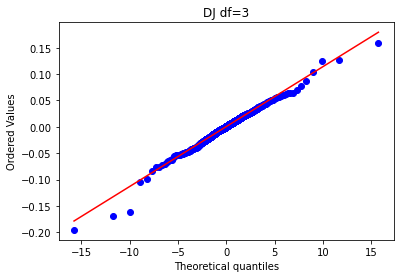

In [ ]:
stats.probplot(L.DJ, dist=stats.t(3), plot=pylab,fit=True)
plt.title('DJ df=3')
plt.savefig('qqstu3_DJ',dpi=400)
plt.show()

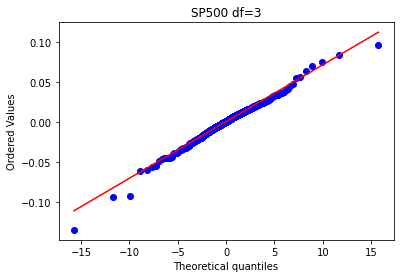

In [ ]:
stats.probplot(L.SP500, dist=stats.t(3), plot=pylab,fit=True)
plt.title('SP500 df=3')
plt.savefig('qqstu3_SP500',dpi=400)
plt.show()

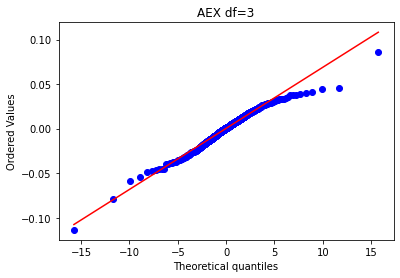

In [ ]:
stats.probplot(L.AEX, dist=stats.t(3), plot=pylab,fit=True)
plt.title('AEX df=3')
plt.savefig('qqstu3_AEX',dpi=400)
plt.show()

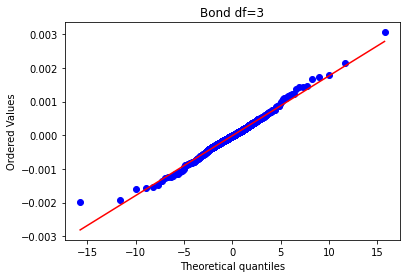

In [ ]:
stats.probplot(L.bond, dist=stats.t(3), plot=pylab,fit=True)
plt.title('Bond df=3')
plt.savefig('qqstu3_bond',dpi=400)
plt.show()

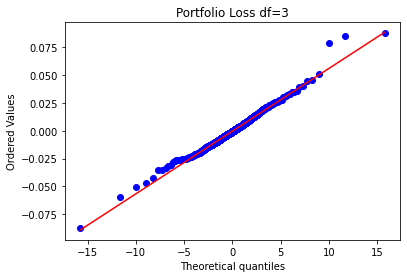

In [ ]:
# check Student-t assumption with QQ plots 
# which degree?
stats.probplot(L.loss, dist=stats.t(3), plot=pylab,fit=True)
plt.title('Portfolio Loss df=3')
plt.savefig('qqstu3_loss',dpi=400)
plt.show()

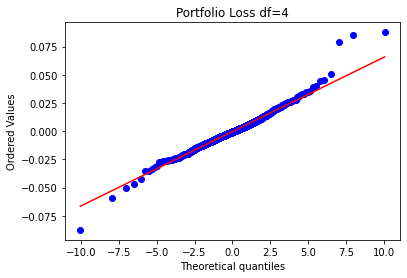

In [ ]:
stats.probplot(L.loss, dist=stats.t(4), plot=pylab,fit=True)
plt.title('Portfolio Loss df=4')
plt.savefig('qqstu4_loss',dpi=400)
plt.show()

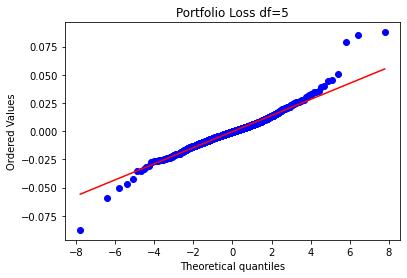

In [ ]:
stats.probplot(L.loss, dist=stats.t(5), plot=pylab,fit=True)
plt.title('Portfolio Loss df=5')
plt.savefig('qqstu5_loss',dpi=400)
plt.show()

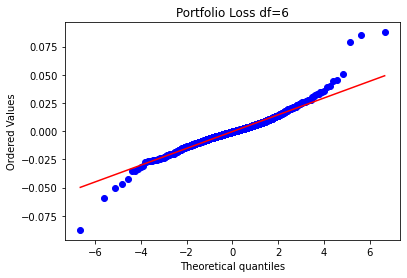

In [ ]:
stats.probplot(L.loss, dist=stats.t(6), plot=pylab,fit=True)
plt.title('Portfolio Loss df=6')
plt.savefig('qqstu6_loss',dpi=400)
plt.show()

In [ ]:
# use different number of years for your historical simulation (e.g. 5 and 10 years)
# and compare the VaR and ES estimates.
# rolling window?
five= L.loss[:1250]
five_VaR975=five.quantile(q=0.975)
five_ES975=np.mean(five[five>= five_VaR975])
five_VaR99=five.quantile(q=0.99)
five_ES99=np.mean(five[five>= five_VaR99])
print('5Y 975VaR:',five_VaR975*1000000)
print('5Y 975ES:',five_ES975*1000000)
print('5Y 99VaR:',five_VaR99*1000000)
print('5Y 99ES:',five_ES99*1000000)

ten_VaR975=L.loss[:].quantile(q=0.975)
ten_ES975=np.mean(L.loss[L.loss>= ten_VaR975])
ten_VaR99=L.loss[:].quantile(q=0.99)
ten_ES99=np.mean(L.loss[L.loss>= ten_VaR99])
print('10Y 975VaR:',ten_VaR975*1000000)
print('10Y 975ES:',ten_ES975*1000000)
print('10Y 99VaR:',ten_VaR99*1000000)
print('10Y 99ES:',ten_ES99*1000000)

5Y 975VaR: 17897.481048198464
5Y 975ES: 25482.253542911425
5Y 99VaR: 25158.951562082642
5Y 99ES: 31985.368903681763
10Y 975VaR: 19312.911529810393
10Y 975ES: 28813.846699261907
10Y 99VaR: 25713.009411149324
10Y 99ES: 39314.89347191871


In [ ]:
def hs_roll(returns,k,step=1): # k-window length step-window step
    result = pd.DataFrame(columns=['VaR_975','VaR_99','ES_975','ES_99'])
    result['VaR_975']=returns[:]*1000000
    for i in range(0, len(result)-k,step): 
        temp = returns[i:i+k]*1000000
        result['VaR_975'][i+k-step:i+k]= temp.quantile(q=0.975)
        result['ES_975'][i+k-step:i+k]= temp[temp >= temp.quantile(0.975)].mean()
        result['VaR_99'][i+k-step:i+k]=temp.quantile(q=0.99)
        result['ES_99'][i+k-step:i+k]= temp[temp >= temp.quantile(0.99)].mean()
    return result.dropna()

In [ ]:
hs_roll_five =hs_roll(L.loss[0:1250],500,step=250)
hs_roll_ten=hs_roll(L.loss,500,step=250)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/p

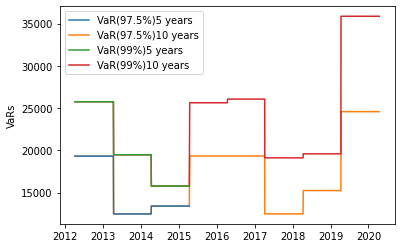

In [ ]:
plt.plot(hs_roll_five['VaR_975'],label='VaR(97.5%)5 years',zorder=2)
plt.plot(hs_roll_ten['VaR_975'],label='VaR(97.5%)10 years',zorder=1)
plt.plot(hs_roll_five['VaR_99'],label='VaR(99%)5 years',zorder=4)
plt.plot(hs_roll_ten['VaR_99'],label='VaR(99%)10 years',zorder=3)
plt.ylabel('VaRs')
plt.legend(loc='best')
plt.savefig('HS_VaR_comparison',dpi=400)
plt.show()

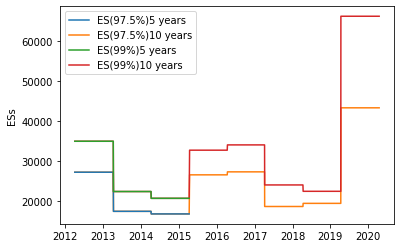

In [ ]:
plt.plot(hs_roll_five['ES_975'],label='ES(97.5%)5 years',zorder=2)
plt.plot(hs_roll_ten['ES_975'],label='ES(97.5%)10 years',zorder=1)
plt.plot(hs_roll_five['ES_99'],label='ES(99%)5 years',zorder=4)
plt.plot(hs_roll_ten['ES_99'],label='ES(99%)10 years',zorder=3)
plt.ylabel('ESs')
plt.legend(loc='best')
plt.savefig('HS_ES_comparison',dpi=400)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=645d3506-ee2c-44c9-a8e9-fa6f8711818a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>